In [2]:
import pandas as pd
import os

# Directories containing the .en files
directories = ['/home/mfi/Desktop/mfi/full_simulations/1_Guest', '/home/mfi/Desktop/mfi/full_simulations/0_Guest', '/home/mfi/Desktop/mfi/full_simulations/Guest']

# Dictionary to store DataFrames with different names (E1, E2, E3, etc.)
dfs_by_name = {}

# Iterate through directories
for idx, directory in enumerate(directories, start=1):
    # Get a list of .en files sorted in ascending order based on their names
    en_files = sorted([filename for filename in os.listdir(directory) if filename.endswith('.en')])
    
    # List to store DataFrames for the current directory
    dfs = []
    
    # Loop through sorted files in the current directory
    for filename in en_files:
        file_path = os.path.join(directory, filename)
        # Load each .en file into a DataFrame and append to the list
        df = pd.read_csv(file_path, delimiter='\s+', header=None)
        df['run'] = filename
        dfs.append(df)
    
    # Concatenate all DataFrames in the current directory into a single DataFrame
    merged_df = pd.concat(dfs, axis=0, ignore_index=True)
    
    #Include only the first 125000 rows
    merged_df = merged_df.iloc[:125002, :]
    
    # Add values in column 5 (index 4) with values in column 7 (index 6) and store in a new column 'E_tot'
    merged_df['E_tot'] = merged_df.iloc[:, 4] + merged_df.iloc[:, 6]
    
    # Store the merged DataFrame with a unique name (E1, E2, E3, etc.)
    df_name = f'E{idx}'
    dfs_by_name[df_name] = merged_df
    
#Replace the values in the first columns of dfs_by_name['E1'] with their index doubled
dfs_by_name['E1'].iloc[:, 0] = dfs_by_name['E1'].index * 2
    

# Now, dfs_by_name is a dictionary where keys are names (E1, E2, E3, etc.) and values are corresponding DataFrames
# You can access each DataFrame using dictionary keys, for example: dfs_by_name['E1']


In [3]:
dfs_by_name["E1"].head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,run,E_tot
0,0,1.0,310.517169,-58.640062,-945992.048162,0.0,605.646193,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.587859e-15,23.0,MIL68Ga-guest-07.en,-945386.401970
1,2,1.0,313.412145,127.202761,-945996.699612,0.0,611.292680,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9.256808e-16,19.5,MIL68Ga-guest-07.en,-945385.406932
2,4,1.0,313.114290,-115.514084,-945996.084135,0.0,610.711731,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.353195e-15,20.5,MIL68Ga-guest-07.en,-945385.372404
3,6,1.0,314.852448,-586.959441,-946005.031319,0.0,614.101910,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.387586e-15,20.5,MIL68Ga-guest-07.en,-945390.929409
4,8,1.0,314.812932,-620.318984,-946002.624436,0.0,614.024835,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.625231e-15,20.0,MIL68Ga-guest-07.en,-945388.599601


In [4]:
dfs_by_name["E1"].tail()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,run,E_tot
124997,249994,1.0,301.248995,-3085.033842,-945988.832922,0.0,587.569144,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.788236e-14,17.5,MIL68Ga-guest-11.en,-945401.263778
124998,249996,1.0,299.789102,-2559.825811,-945980.215063,0.0,584.721705,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.730820e-14,17.5,MIL68Ga-guest-11.en,-945395.493357
124999,249998,1.0,308.221914,-1473.024395,-945991.806248,0.0,601.169429,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.830782e-14,16.5,MIL68Ga-guest-11.en,-945390.636820
125000,250000,1.0,296.282889,-332.046960,-945965.552330,0.0,577.883034,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.316833e-16,19.0,MIL68Ga-guest-12.en,-945387.669296
125001,250002,1.0,291.097172,-217.044270,-945951.930222,0.0,567.768586,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.968122e-16,17.0,MIL68Ga-guest-12.en,-945384.161635


In [5]:
dfs_by_name["E2"].head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,run,E_tot
0,35002,1.0,286.353572,-1969.694918,-916997.993758,0.0,532.624972,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6.762495e-16,8.0,MIL68Ga-md-08.en,-916465.368787
1,35004,1.0,286.733401,-2422.809494,-916994.827238,0.0,533.331462,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.760448e-16,6.0,MIL68Ga-md-08.en,-916461.495776
2,35006,1.0,286.064593,-2339.404884,-916991.954097,0.0,532.087462,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6.285850e-16,7.0,MIL68Ga-md-08.en,-916459.866634
3,35008,1.0,287.304045,-1398.413096,-916996.553442,0.0,534.392876,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.093191e-15,6.5,MIL68Ga-md-08.en,-916462.160567
4,35010,1.0,300.912709,-167.705352,-917019.351449,0.0,559.705339,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.885666e-15,7.0,MIL68Ga-md-08.en,-916459.646110


In [6]:
dfs_by_name["E2"].tail()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,run,E_tot
24995,84992,1.0,304.769520,-3053.449589,-917007.398221,0.0,566.879105,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.125331e-13,8.0,MIL68Ga-md-08.en,-916440.519116
24996,84994,1.0,299.644356,-2275.102542,-916990.713194,0.0,557.346169,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.138091e-13,8.0,MIL68Ga-md-08.en,-916433.367026
24997,84996,1.0,309.476608,-1530.783181,-917002.687610,0.0,575.634409,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.133676e-13,8.0,MIL68Ga-md-08.en,-916427.053201
24998,84998,1.0,305.007001,-828.835535,-916988.772166,0.0,567.320826,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.150772e-13,7.5,MIL68Ga-md-08.en,-916421.451339
24999,85000,1.0,304.132819,-680.416196,-916980.787368,0.0,565.694824,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.155613e-13,7.5,MIL68Ga-md-08.en,-916415.092544


In [7]:
dfs_by_name["E3"].head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,run,E_tot
0,52882,1.0,342.531671,-3.905743,-28958.561530,0.0,30.970998,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.881892e-17,1.5,ligand-08.en,-28927.590532
1,52884,1.0,297.250791,-2.550236,-28953.545014,0.0,26.876795,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.744520e-17,0.5,ligand-08.en,-28926.668218
2,52886,1.0,329.511583,-0.030065,-28956.722842,0.0,29.793749,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6.240531e-17,0.0,ligand-08.en,-28926.929094
3,52888,1.0,327.160237,1.918595,-28957.360595,0.0,29.581145,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9.166330e-17,0.5,ligand-08.en,-28927.779450
4,52890,1.0,343.811902,1.833479,-28958.292452,0.0,31.086754,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.465624e-17,0.5,ligand-08.en,-28927.205698


In [8]:
dfs_by_name["E3"].tail()
dfs_by_name["E1"].iloc[:, 21]

0        -945386.401970
1        -945385.406932
2        -945385.372404
3        -945390.929409
4        -945388.599601
              ...      
124997   -945401.263778
124998   -945395.493357
124999   -945390.636820
125000   -945387.669296
125001   -945384.161635
Name: E_tot, Length: 125002, dtype: float64

In [9]:
avg_1 = dfs_by_name["E1"].iloc[:, 21].mean()
avg_2 = dfs_by_name["E2"].iloc[:, 21].mean()
avg_3 = dfs_by_name["E3"].iloc[:, 21].mean()

print(avg_1, avg_2, avg_3)

-945420.2792240264 -916446.5863790571 -28937.186536978807


In [10]:
U_int = dfs_by_name["E1"].iloc[:, 21] - (avg_2 + avg_3)

print(U_int.mean()*4.184)
print(U_int*4.184)

-152.74239263240986
0        -10.999960
1         -6.836723
2         -6.692259
3        -29.942766
4        -20.194848
            ...    
124997   -73.181766
124998   -49.038326
124999   -28.718573
125000   -16.302454
125001    -1.626402
Name: E_tot, Length: 125002, dtype: float64


[-10.99995969  -6.83672279  -6.69225881 ... -28.71857272 -16.30245356
  -1.62640169]
avg of second half: -150.6736163928448 kJ/mol


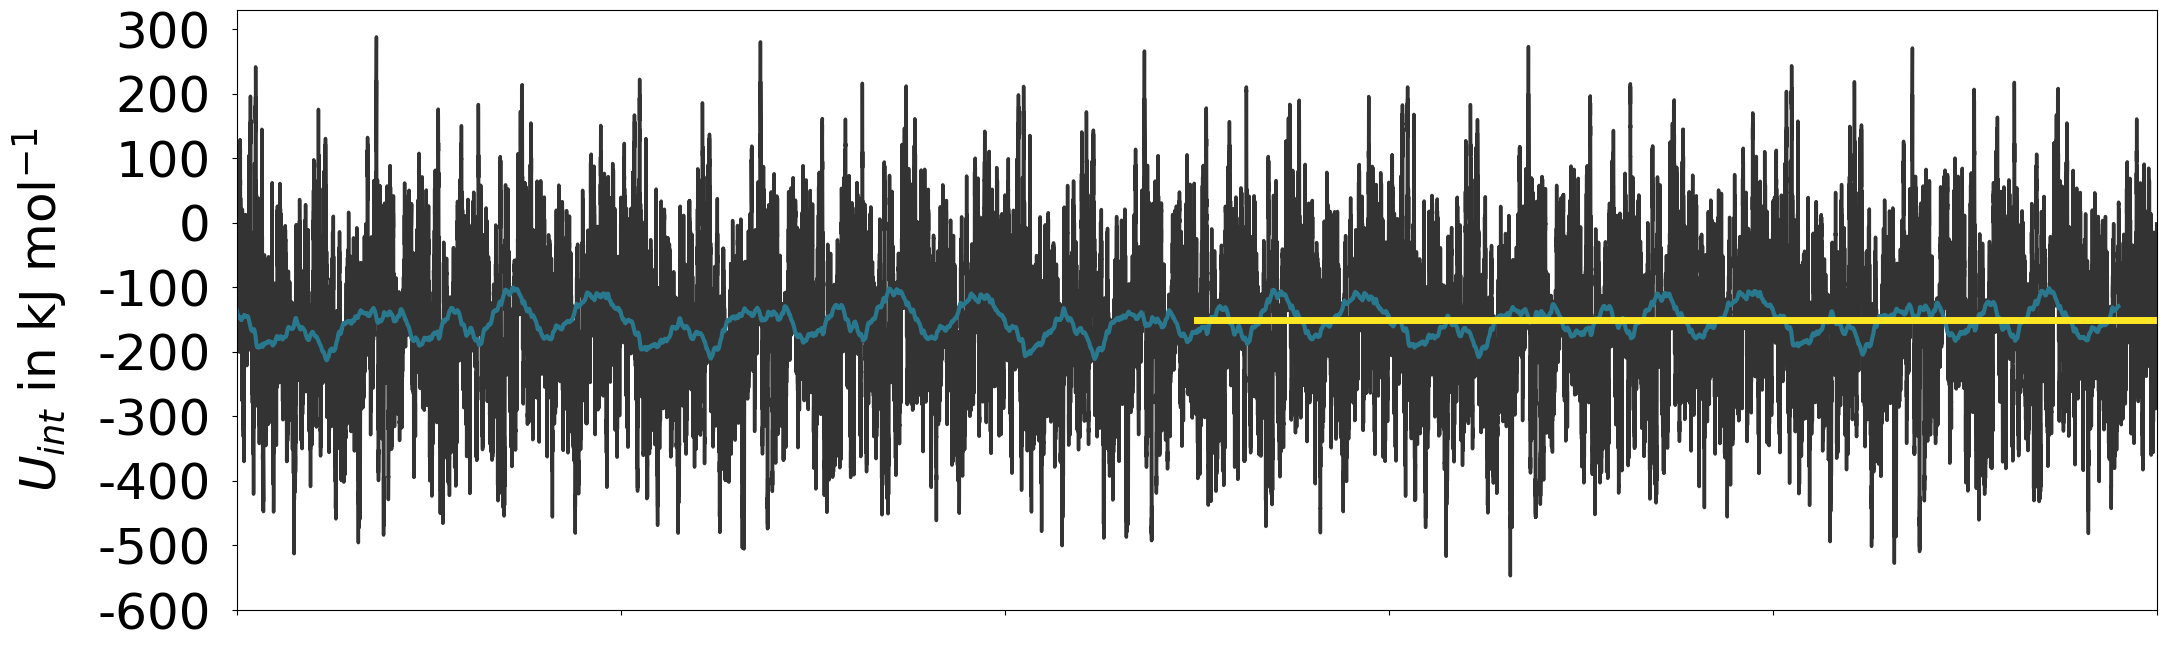

In [11]:
import matplotlib.pyplot as plt
import numpy as np
#from matplotlib.pyplot import colormaps
import seaborn as sns

plt.style.use('default')
sns.set_style(rc = {'axes.facecolor': '#FFFFFF'})

#plt.style.use('default')

# Assuming dfs_by_name is the dictionary containing your DataFrames (E1, E2, E3, etc.)
# For example, dfs_by_name = {'E1': E1, 'E2': E2, 'E3': E3, ...}

# Specify the end point for the transparent range
x_end = 0.0 # end of the transparent range (set your value)


# Get x-values from DataFrame E1
x_values = dfs_by_name['E1'].iloc[: 0] * 2 / 1000000  # Assuming column 1 is used as x-values

# Get y-values from DataFrame E2
y_values = U_int * 4.184 

# Convert to NumPy arrays
x_values = np.array(dfs_by_name['E1'].iloc[:, 0]) * 2 / 1000000  # Convert to array
y_values = np.array(U_int) * 4.184  # Convert to array
print(y_values)

x_values = np.sort(x_values)

# Calculate the mean of the second part of y_values
second_part_mean = y_values[len(y_values) // 2:].mean()

print(f'avg of second half: {second_part_mean} kJ/mol')

# Calculate running average with a window size of 100 data points
window_size = 2500
running_avg = np.convolve(y_values, np.ones(window_size)/window_size, mode='valid')
#print(f"current running avg: {running_avg[-1]} kJ/mol")

# Adjust x-values to match the running average length
adjusted_x_values = np.sort(x_values[:len(running_avg)])

# Plotting x-values vs y-values
plt.figure(figsize=(24, 8))
plt.xlim(min(x_values), max(x_values))
#plt.plot(x_values[1:-1], y_values[1:-1], linewidth="1", color="k", alpha=0.8)

# Part 1: From the start up to x_end (transparent)
mask1 = x_values <= x_end
plt.plot(x_values[mask1], y_values[mask1], linewidth="2.5", color="k", alpha=0.3)

# Part 2: From x_end to the end (non-transparent)
mask2 = x_values > x_end
plt.plot(x_values[mask2], y_values[mask2], linewidth="2.5", color="k", alpha=0.8)

# Plotting running avg
plt.plot(adjusted_x_values, running_avg, linestyle='-', color="#2a788e", linewidth="3", label=f'Running Average (Window Size: {window_size})')

# Determine the range for x-axis ticks
x_min = min(x_values)
x_max = max(x_values)
y_min = min(y_values)
y_max = max(y_values)
x_ticks = np.arange(x_min, x_max, 0.1)  # Adjust 0.1 to the desired spacing
#plt.xticks(x_ticks, fontsize="28")  # Set x-axis ticks
#y_ticks = np.arange(y_min, y_max, 100)
#plt.yticks(y_ticks, fontsize="12")

# Round down y_min to the nearest 100 and round up y_max to the nearest 100
y_start = 100 * (y_min // 100)
y_end = 100 * (y_max // 100 + 1)

# Generate y-axis ticks
y_ticks = np.arange(y_start, y_end+0.000001, 100)  # Adjust 100 to the desired spacing

# Add the specific number to the existing y_ticks
specific_number = second_part_mean  # Replace with your specific number
#y_ticks = np.append(y_ticks, specific_number)

# Define custom labels for the y-axis
#y_labels = [f'{tick}' if tick != specific_number else r'$\mathbf{' + f'{tick:.2f}' + '}$' for tick in y_ticks]
y_labels = [f'{int(tick)}' if tick != specific_number else r'$\mathbf{' + f'{int(tick)}' + '}$' for tick in y_ticks]


plt.yticks(y_ticks, y_labels, fontsize="36")  # Set y-axis ticks

# Add this line to display tick mark lines inside the plot area
plt.tick_params(axis='both', which='both', direction='out', bottom=True, top=False, left=True, right=False, pad=15)

# Specify xmin parameter to visually show the second half of the mean line
#plt.axvline(x=x_max/2, linestyle='-', color="#fde725", linewidth="2.5")
plt.axhline(y=second_part_mean, linestyle='-', color="#fde725", linewidth="5",label=f'Average of Second Half: {second_part_mean:.1f} kJ/mol', xmin=0.5, xmax=1)
#plt.xlabel('Simulation Time in ns', fontsize='36', labelpad = 20)
plt.ylabel(r'$U_{int}$ in kJ mol$^{-1}$', fontsize='36', labelpad = 20)
#plt.title('ΔU of 1guest@MOF')
#plt.grid(linestyle="-")
#plt.fill_between(running_avg.index, 0, running_avg, color="b", alpha=0.1)
#plt.legend()
plt.grid(False)
#plt.title('1Phth@MIL-68(Ga)', fontsize='36')
#plt.legend(fontsize='18', loc = "upper right")
plt.subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.90)
plt.gca().xaxis.set_tick_params(labelbottom=False)
plt.savefig("/home/mfi/Desktop/mfi/full_simulations/1_Guest/1GuestEnergy@MOF.png")
plt.show()